In [1]:
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns
import copy
import matplotlib.pyplot as plt
import pandas
import matplotlib.dates as mdates
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py

import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('/content/BBRI.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-01,790.895447,795.440796,749.987061,790.895447,498.008789,361037235
1,2010-04-05,813.622314,818.167664,790.895447,813.622314,512.319336,251524844
2,2010-04-06,795.440796,822.713074,790.895447,795.440796,500.870850,110573909
3,2010-04-07,790.895447,799.986206,781.804688,790.895447,498.008789,269427653
4,2010-04-08,754.532410,781.804688,745.441650,754.532410,475.111847,290592019
...,...,...,...,...,...,...,...
3456,2024-03-22,6050.000000,6125.000000,6050.000000,6125.000000,6125.000000,46529200
3457,2024-03-25,6250.000000,6250.000000,6125.000000,6250.000000,6250.000000,115729600
3458,2024-03-26,6300.000000,6300.000000,6200.000000,6300.000000,6300.000000,120748400
3459,2024-03-27,6300.000000,6325.000000,6225.000000,6250.000000,6250.000000,73308900


SIMPLE MOVING AVERAGE

In [3]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [4]:
df['SMA_7'] = df['Close'].rolling(7).mean().shift()
df['SMA_14'] = df['Close'].rolling(14).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_7, name='SMA 7'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_14, name='SMA 14'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [5]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI_7'] = RSI(df,n=7)
df['RSI_14'] = RSI(df)
df['RSI_30'] = RSI(df,n=30)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.RSI_7, name='RSI 7'))
fig.add_trace(go.Scatter(x=df.Date, y=df.RSI_14, name='RSI 14'))
fig.add_trace(go.Scatter(x=df.Date, y=df.RSI_30, name='RSI 30'))
fig.show()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_7,SMA_14,SMA_30,RSI_7,RSI_14,RSI_30
0,2010-04-01,790.895447,795.440796,749.987061,790.895447,498.008789,361037235,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-04-05,813.622314,818.167664,790.895447,813.622314,512.319336,251524844,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-04-06,795.440796,822.713074,790.895447,795.440796,500.870850,110573909,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07,790.895447,799.986206,781.804688,790.895447,498.008789,269427653,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-08,754.532410,781.804688,745.441650,754.532410,475.111847,290592019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,2024-03-22,6050.000000,6125.000000,6050.000000,6125.000000,6125.000000,46529200,6103.571429,6137.500000,6104.166667,26.086957,50.000000,56.179775
3457,2024-03-25,6250.000000,6250.000000,6125.000000,6250.000000,6250.000000,115729600,6064.285714,6137.500000,6113.333333,61.111111,55.555556,60.439560
3458,2024-03-26,6300.000000,6300.000000,6200.000000,6300.000000,6300.000000,120748400,6078.571429,6146.428571,6129.166667,100.000000,61.363636,60.439560
3459,2024-03-27,6300.000000,6325.000000,6225.000000,6250.000000,6250.000000,73308900,6125.000000,6164.285714,6145.000000,85.714286,55.813953,58.695652


In [7]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_7,SMA_14,SMA_30,RSI_7,RSI_14,RSI_30
0,2010-04-01,790.895447,795.440796,749.987061,790.895447,498.008789,361037235,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-04-05,813.622314,818.167664,790.895447,813.622314,512.319336,251524844,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-04-06,795.440796,822.713074,790.895447,795.440796,500.870850,110573909,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07,790.895447,799.986206,781.804688,790.895447,498.008789,269427653,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-08,754.532410,781.804688,745.441650,754.532410,475.111847,290592019,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-04-09,740.896301,759.077820,736.350891,740.896301,466.525421,239061629,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-04-12,786.350037,786.350037,745.441650,786.350037,495.146759,236229080,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-04-13,790.895447,790.895447,768.168579,790.895447,498.008789,81104400,781.804679,NaN,NaN,50.000000,NaN,NaN
8,2010-04-14,772.713928,799.986206,763.623169,772.713928,486.560272,206061059,781.804679,NaN,NaN,35.483873,NaN,NaN
9,2010-04-15,745.441650,777.259277,740.896301,745.441650,469.387604,348392517,775.960624,NaN,NaN,33.333333,NaN,NaN


In [8]:
df['EMA_12'] = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
df['EMA_26'] = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(df.EMA_12 - df.EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.MACD_signal, name='Signal line'), row=2, col=1)
fig.show()


In [9]:
# https://stackoverflow.com/questions/30261541/slow-stochastic-implementation-in-python-pandas
def stochastic(df, k, d):
    df = df.copy()
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stoch_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stoch_d'] = df['stoch_k'].rolling(window=d).mean()
    return df

df = stochastic(df, k=14, d=3)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date.tail(365), y=df.stoch_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=df.Date.tail(365), y=df.stoch_d.tail(365), name='D stochastic'))
fig.show()

In [10]:
def bollinger_bands(df, window=20, num_std_dev=2):
  df['Rolling_Mean'] = df['Close'].rolling(window=window).mean()
  df['Rolling_Std'] = df['Close'].rolling(window=window).std()
  df['Bollinger_Upper'] = df['Rolling_Mean'] + (df['Rolling_Std'] * num_std_dev)
  df['Bollinger_Lower'] = df['Rolling_Mean'] - (df['Rolling_Std'] * num_std_dev)
  return df
def plot_bollinger_bands(df):
    plt.figure(figsize=(14,7))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['Rolling_Mean'], label='Rolling Mean', color='orange')
    plt.plot(df['Bollinger_Upper'], label='Upper Band', color='green')
    plt.plot(df['Bollinger_Lower'], label='Lower Band', color='red')
    plt.fill_between(df.index, df['Bollinger_Upper'], df['Bollinger_Lower'], color='gray', alpha=0.3)
    plt.title('Bollinger Bands')
    plt.legend()
    plt.show()

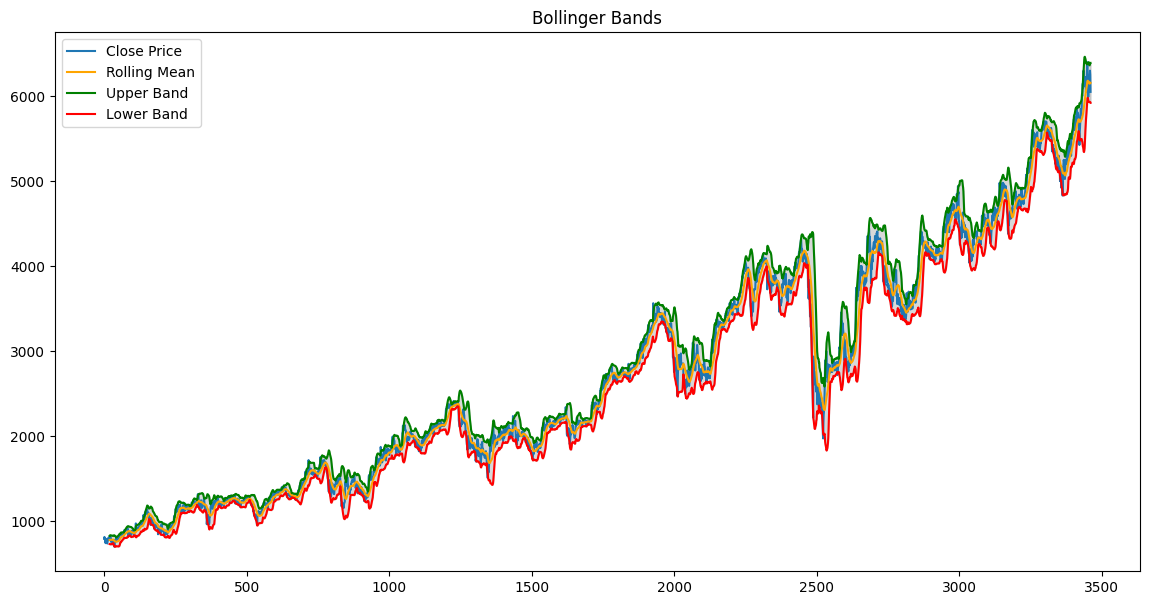

In [11]:
df = bollinger_bands(df)
plot_bollinger_bands(df)

In [12]:
def aroon_oscillator(df, window=25):
    df['Aroon_Up'] = 100 * df['Close'].rolling(window).apply(lambda x: np.argmax(x) / window, raw=False)
    df['Aroon_Down'] = 100 * df['Close'].rolling(window).apply(lambda x: np.argmin(x) / window, raw=False)
    df['Aroon_Oscillator'] = df['Aroon_Up'] - df['Aroon_Down']
    return df

def plot_aroon_oscillator(df):
    plt.figure(figsize=(14,7))
    plt.plot(df['Aroon_Up'], label='Aroon Up', color='green')
    plt.plot(df['Aroon_Down'], label='Aroon Down', color='red')
    plt.plot(df['Aroon_Oscillator'], label='Aroon Oscillator', color='blue')
    plt.title('Aroon Oscillator')
    plt.legend()
    plt.show()

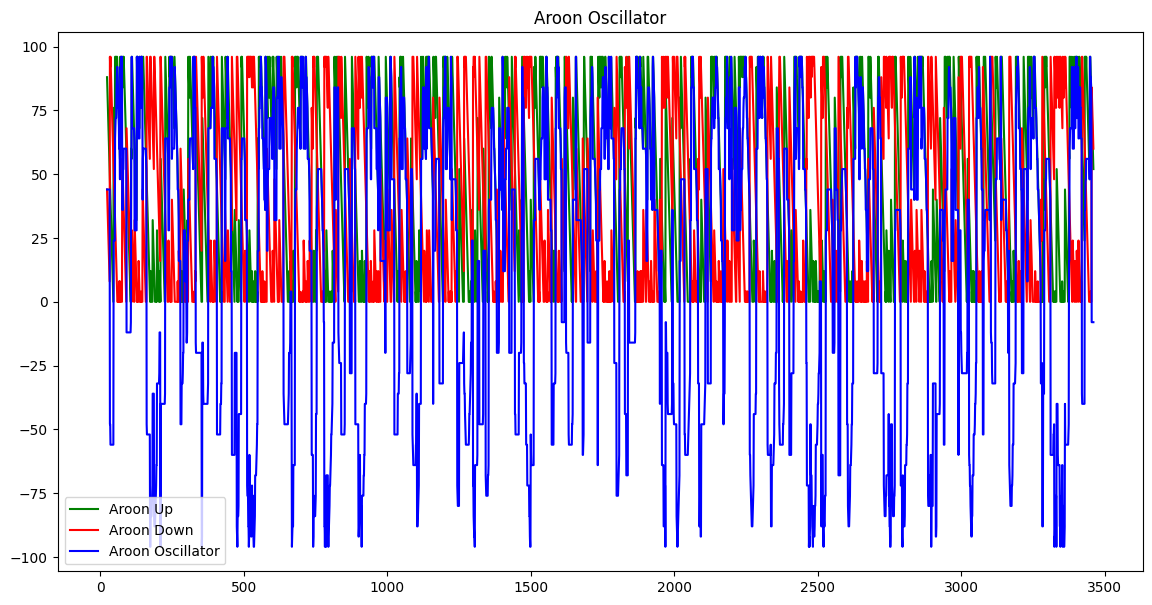

In [13]:
df = aroon_oscillator(df)
plot_aroon_oscillator(df)

In [14]:
def momentum(df, window=10):
    df['Momentum'] = df['Close'] - df['Close'].shift(window)
    return df

def plot_momentum(df):
    plt.figure(figsize=(14,7))
    plt.plot(df['Momentum'], label='Momentum', color='blue')
    plt.title('Momentum')
    plt.legend()
    plt.show()


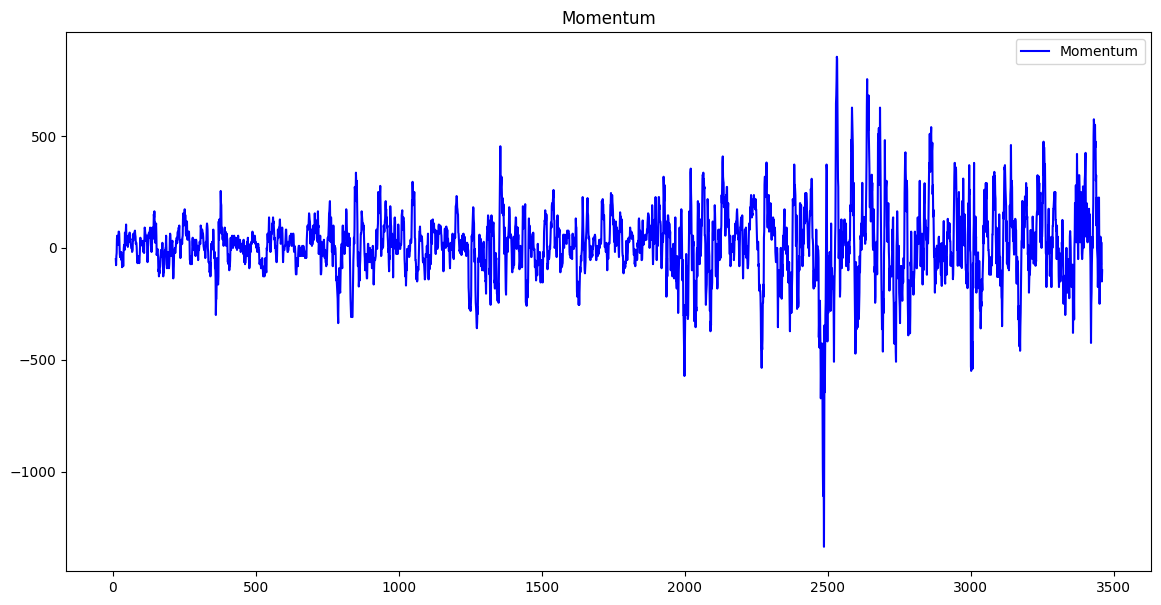

In [15]:
df = momentum(df)
plot_momentum(df)

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_7,SMA_14,SMA_30,...,stoch_k,stoch_d,Rolling_Mean,Rolling_Std,Bollinger_Upper,Bollinger_Lower,Aroon_Up,Aroon_Down,Aroon_Oscillator,Momentum
0,2010-04-01,790.895447,795.440796,749.987061,790.895447,498.008789,361037235,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-04-05,813.622314,818.167664,790.895447,813.622314,512.319336,251524844,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-04-06,795.440796,822.713074,790.895447,795.440796,500.870850,110573909,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07,790.895447,799.986206,781.804688,790.895447,498.008789,269427653,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-08,754.532410,781.804688,745.441650,754.532410,475.111847,290592019,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,2024-03-22,6050.000000,6125.000000,6050.000000,6125.000000,6125.000000,46529200,6103.571429,6137.500000,6104.166667,...,35.0,31.666667,6147.50,107.880294,6363.260589,5931.739411,68.0,76.0,-8.0,-75.0
3457,2024-03-25,6250.000000,6250.000000,6125.000000,6250.000000,6250.000000,115729600,6064.285714,6137.500000,6113.333333,...,60.0,41.666667,6147.50,107.880294,6363.260589,5931.739411,64.0,72.0,-8.0,25.0
3458,2024-03-26,6300.000000,6300.000000,6200.000000,6300.000000,6300.000000,120748400,6078.571429,6146.428571,6129.166667,...,70.0,55.000000,6156.25,112.937745,6382.125490,5930.374510,60.0,68.0,-8.0,-50.0
3459,2024-03-27,6300.000000,6325.000000,6225.000000,6250.000000,6250.000000,73308900,6125.000000,6164.285714,6145.000000,...,60.0,63.333333,6160.00,114.822518,6389.645035,5930.354965,56.0,64.0,-8.0,-150.0


WEIGHTED MOVING AVERAGE

In [17]:
def weighted_moving_average(df, window=10):
    weights = np.arange(1, window+1)
    df['WMA'] = df['Close'].rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
    return df

def plot_wma(df):
    plt.figure(figsize=(14,7))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['WMA'], label='Weighted Moving Average', color='orange')
    plt.title('Weighted Moving Average (WMA)')
    plt.legend()
    plt.show()


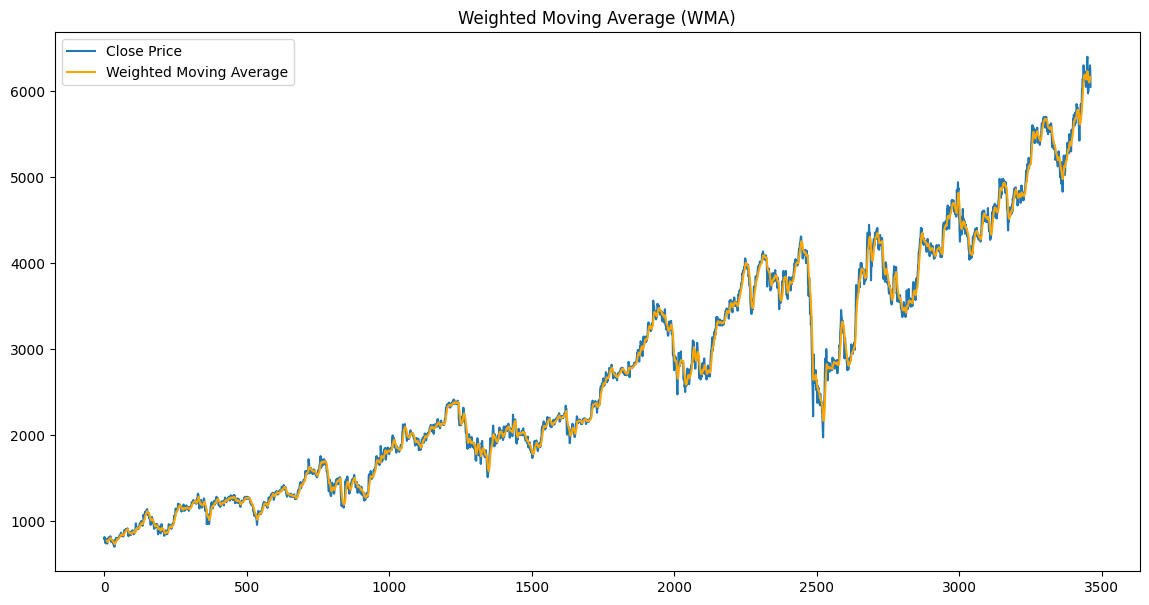

In [18]:
df = weighted_moving_average(df)
plot_wma(df)

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_7,SMA_14,SMA_30,...,stoch_d,Rolling_Mean,Rolling_Std,Bollinger_Upper,Bollinger_Lower,Aroon_Up,Aroon_Down,Aroon_Oscillator,Momentum,WMA
0,2010-04-01,790.895447,795.440796,749.987061,790.895447,498.008789,361037235,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-04-05,813.622314,818.167664,790.895447,813.622314,512.319336,251524844,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-04-06,795.440796,822.713074,790.895447,795.440796,500.870850,110573909,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07,790.895447,799.986206,781.804688,790.895447,498.008789,269427653,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-08,754.532410,781.804688,745.441650,754.532410,475.111847,290592019,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,2024-03-22,6050.000000,6125.000000,6050.000000,6125.000000,6125.000000,46529200,6103.571429,6137.500000,6104.166667,...,31.666667,6147.50,107.880294,6363.260589,5931.739411,68.0,76.0,-8.0,-75.0,6100.909091
3457,2024-03-25,6250.000000,6250.000000,6125.000000,6250.000000,6250.000000,115729600,6064.285714,6137.500000,6113.333333,...,41.666667,6147.50,107.880294,6363.260589,5931.739411,64.0,72.0,-8.0,25.0,6120.454545
3458,2024-03-26,6300.000000,6300.000000,6200.000000,6300.000000,6300.000000,120748400,6078.571429,6146.428571,6129.166667,...,55.000000,6156.25,112.937745,6382.125490,5930.374510,60.0,68.0,-8.0,-50.0,6148.636364
3459,2024-03-27,6300.000000,6325.000000,6225.000000,6250.000000,6250.000000,73308900,6125.000000,6164.285714,6145.000000,...,63.333333,6160.00,114.822518,6389.645035,5930.354965,56.0,64.0,-8.0,-150.0,6168.636364


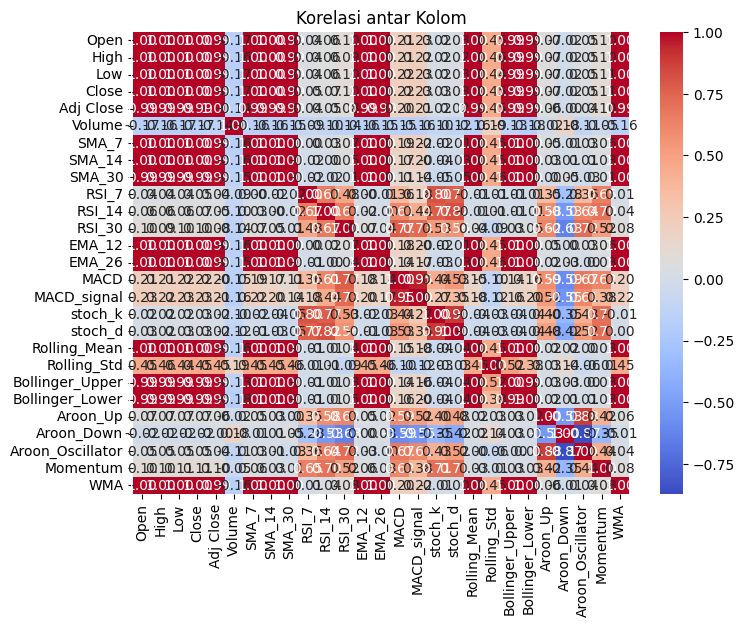

In [20]:
df1 = df.drop('Date', axis=1)
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Kolom')
plt.show()

In [26]:
df1 = df1.dropna(axis=0)
# Hitung matriks korelasi
correlation_matrix = df1.corr().abs()

# Tentukan kolom target
target_columns = ['Close', 'Open', 'Low', 'High']

# Ambil kolom yang korelasinya di atas 50% dengan kolom target
columns_to_keep = set(target_columns)  # Awalnya, simpan kolom target
for target in target_columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[target] > 0.5].tolist()
    columns_to_keep.update(correlated_cols)

# Tambahkan kolom 'Date' dan pastikan berada di urutan pertama
columns_to_keep.add('Date')
columns_to_keep = ['Date'] + [col for col in columns_to_keep if col != 'Date']  # Urutkan agar 'Date' di kiri

# Filter DataFrame hanya dengan kolom yang korelasinya tinggi terhadap target
df_filtered = df[columns_to_keep]

# Simpan hasilnya ke file CSV jika diperlukan
df_filtered.to_csv('df_filtered.csv', index=False)

# Fungsi untuk highlight korelasi di atas threshold
def highlight_above_threshold(val, threshold=0.5):
    color = 'lightcoral' if abs(val) > threshold else 'white'
    return f'background-color: {color}'

# Terapkan fungsi styling pada DataFrame korelasi
styled_corr = correlation_matrix.style.applymap(lambda val: highlight_above_threshold(val, threshold=0.5))

# Tampilkan tabel dengan highlight
styled_corr

<ipython-input-26-bfc578b6d847>:30: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Open,High,Low,Close,Adj Close,Volume,SMA_7,SMA_14,SMA_30,RSI_7,RSI_14,RSI_30,EMA_12,EMA_26,MACD,MACD_signal,stoch_k,stoch_d,Rolling_Mean,Rolling_Std,Bollinger_Upper,Bollinger_Lower,Aroon_Up,Aroon_Down,Aroon_Oscillator,Momentum,WMA
Open,1.000000,0.999665,0.999694,0.999381,0.993478,0.159481,0.998303,0.996764,0.993382,0.038796,0.059326,0.094379,0.998466,0.996261,0.213333,0.225215,0.018123,0.027869,0.996134,0.446286,0.993408,0.993379,0.070796,0.019046,0.051675,0.102125,0.999021
High,0.999665,1.000000,0.999577,0.999691,0.993963,0.150433,0.998244,0.996835,0.993656,0.040518,0.059727,0.093713,0.998526,0.996457,0.210107,0.221619,0.020183,0.026904,0.996281,0.452601,0.994055,0.992988,0.071130,0.016728,0.050554,0.103422,0.999015
Low,0.999694,0.999577,1.000000,0.999700,0.993728,0.166138,0.998102,0.996534,0.993032,0.043035,0.062936,0.098534,0.998324,0.995992,0.216362,0.227744,0.023439,0.030424,0.995901,0.439521,0.992643,0.993721,0.072177,0.021427,0.053822,0.106913,0.998920
Close,0.999381,0.999691,0.999700,1.000000,0.994075,0.157755,0.997898,0.996391,0.992966,0.046790,0.065190,0.099524,0.998221,0.995922,0.215544,0.226295,0.029344,0.031386,0.995800,0.444603,0.992953,0.993179,0.073168,0.020688,0.053974,0.110486,0.998799
Adj Close,0.993478,0.993963,0.993728,0.994075,1.000000,0.136307,0.992411,0.991255,0.988563,0.037117,0.050258,0.079156,0.992867,0.991224,0.199003,0.209069,0.016193,0.017441,0.990849,0.444063,0.988149,0.988096,0.061410,0.005315,0.038474,0.101097,0.993204
Volume,0.159481,0.150433,0.166138,0.157755,0.136307,1.000000,0.156437,0.153903,0.147185,0.086193,0.100646,0.139468,0.155268,0.149978,0.151320,0.160635,0.095874,0.119132,0.152014,0.196991,0.130398,0.174434,0.018497,0.180791,0.113132,0.053604,0.157088
SMA_7,0.998303,0.998244,0.998102,0.997898,0.992411,0.156437,1.000000,0.999189,0.996118,0.000415,0.030341,0.073488,0.999759,0.998373,0.194006,0.217540,0.017322,0.007361,0.998495,0.447582,0.995782,0.995713,0.056394,0.007092,0.036584,0.063002,0.999859
SMA_14,0.996764,0.996835,0.996534,0.996391,0.991255,0.153903,0.999189,1.000000,0.998130,0.015286,0.002314,0.053518,0.999579,0.999401,0.165099,0.195851,0.036852,0.031993,0.999758,0.448825,0.997096,0.996915,0.037365,0.009855,0.015992,0.031242,0.998869
SMA_30,0.993382,0.993656,0.993032,0.992966,0.988563,0.147185,0.996118,0.998130,1.000000,0.023049,0.022867,0.010380,0.997350,0.999410,0.111305,0.140299,0.049766,0.049915,0.999025,0.458149,0.997137,0.995352,0.002644,0.046916,0.025059,0.012894,0.995709
RSI_7,0.038796,0.040518,0.043035,0.046790,0.037117,0.086193,0.000415,0.015286,0.023049,1.000000,0.667379,0.475402,0.003455,0.011663,0.361604,0.181480,0.802858,0.771580,0.015640,0.012022,0.015999,0.015165,0.352905,0.285568,0.365613,0.648963,0.012301


In [22]:
df_filtered

,Date,Bollinger_Upper,Bollinger_Lower,EMA_12,SMA_14,Rolling_Mean,SMA_30,High,EMA_26,SMA_7,Low,Open,WMA,Close,Adj Close
0,2010-04-01,NaN,NaN,NaN,NaN,NaN,NaN,795.440796,NaN,NaN,749.987061,790.895447,NaN,790.895447,498.008789
1,2010-04-05,NaN,NaN,NaN,NaN,NaN,NaN,818.167664,NaN,NaN,790.895447,813.622314,NaN,813.622314,512.319336
2,2010-04-06,NaN,NaN,NaN,NaN,NaN,NaN,822.713074,NaN,NaN,790.895447,795.440796,NaN,795.440796,500.870850
3,2010-04-07,NaN,NaN,NaN,NaN,NaN,NaN,799.986206,NaN,NaN,781.804688,790.895447,NaN,790.895447,498.008789
4,2010-04-08,NaN,NaN,NaN,NaN,NaN,NaN,781.804688,NaN,NaN,745.441650,754.532410,NaN,754.532410,475.111847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,2024-03-22,6363.260589,5931.739411,6114.727696,6137.500000,6147.50,6104.166667,6125.000000,6080.670400,6103.571429,6050.000000,6050.000000,6100.909091,6125.000000,6125.000000
3457,2024-03-25,6363.260589,5931.739411,6135.538820,6137.500000,6147.50,6113.333333,6250.000000,6093.213333,6064.285714,6125.000000,6250.000000,6120.454545,6250.000000,6250.000000
3458,2024-03-26,6382.125490,5930.374510,6160.840540,6146.428571,6156.25,6129.166667,6300.000000,6108.530864,6078.571429,6200.000000,6300.000000,6148.636364,6300.000000,6300.000000
3459,2024-03-27,6389.645035,5930.354965,6174.557380,6164.285714,6160.00,6145.000000,6325.000000,6119.010059,6125.000000,6225.000000,6300.000000,6168.636364,6250.000000,6250.000000


In [23]:
df_filtered = df_filtered.dropna(axis=0)
df_filtered.to_excel('BBCA_PraProcessing.xlsx',index=False)